In [1]:
import pandas as pd
import os

# input rawdata

In [27]:
path=os.path.join('~','station2grid','datasets','rawdata','air','airbox-2017.csv')
df=pd.read_csv(path)
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
1,2017-01-01,08:00:04,74DA3895DFA4,78.0,95.0,57.0,22.25,82.0,23.961,120.468
2,2017-01-01,08:00:05,74DA3895C222,57.0,74.0,39.0,21.25,89.0,24.184,120.602
3,2017-01-01,08:00:06,74DA3895C3AC,30.0,34.0,24.0,21.62,78.0,24.304,120.717
4,2017-01-01,08:00:08,28C2DDDD40E0,23.0,0.0,0.0,30.62,100.0,1.280,103.817


In [3]:
df=df[:100000].copy()
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
1,2017-01-01,08:00:04,74DA3895DFA4,78.0,95.0,57.0,22.25,82.0,23.961,120.468
2,2017-01-01,08:00:05,74DA3895C222,57.0,74.0,39.0,21.25,89.0,24.184,120.602
3,2017-01-01,08:00:06,74DA3895C3AC,30.0,34.0,24.0,21.62,78.0,24.304,120.717
4,2017-01-01,08:00:08,28C2DDDD40E0,23.0,0.0,0.0,30.62,100.0,1.280,103.817


# check device same lat,lon

In [4]:
dummy=df[['lat','lon','device_id']].drop_duplicates(subset=['device_id'])
c=dummy.duplicated(subset=['lat','lon'],keep=False)
dummy[c].sort_values(by=['lat','lon']).head(4)

,lat,lon,device_id
313,25.015,121.537,74DA388FF43A
392,25.015,121.537,74DA388FF3B2
28,25.017,121.540,74DA388FF3AE
85,25.017,121.540,74DA388FF42C


# add new time label

In [5]:
def change_time_interval(dt,time_interval):
    dt=pd.to_datetime(dt)
    minute = dt.minute
    second = dt.second
    minute = minute+(second/60)
    minute = round(minute/time_interval) * time_interval
    dt = dt.replace(minute=0,second=0)
    dt = dt+pd.Timedelta(minutes=minute)
    return dt
    
0
15
30
45
60

time_interval=30
print(change_time_interval('2018-11-28 22:14:31',time_interval))
print(change_time_interval('2018-11-28 22:16:31',time_interval))
print(change_time_interval('2018-11-28 22:44:31',time_interval))


2018-11-28 22:00:00
2018-11-28 22:30:00
2018-11-28 22:30:00


In [6]:
df['dt']=df.apply(lambda row: row['Date']+' '+row['Time'],axis=1)
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,dt
0,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692,2017-01-01 08:00:01
1,2017-01-01,08:00:04,74DA3895DFA4,78.0,95.0,57.0,22.25,82.0,23.961,120.468,2017-01-01 08:00:04
2,2017-01-01,08:00:05,74DA3895C222,57.0,74.0,39.0,21.25,89.0,24.184,120.602,2017-01-01 08:00:05
3,2017-01-01,08:00:06,74DA3895C3AC,30.0,34.0,24.0,21.62,78.0,24.304,120.717,2017-01-01 08:00:06
4,2017-01-01,08:00:08,28C2DDDD40E0,23.0,0.0,0.0,30.62,100.0,1.280,103.817,2017-01-01 08:00:08


In [7]:
df['dt2']=df['dt'].apply(lambda x: change_time_interval(x,30))
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,dt,dt2
0,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692,2017-01-01 08:00:01,2017-01-01 08:00:00
1,2017-01-01,08:00:04,74DA3895DFA4,78.0,95.0,57.0,22.25,82.0,23.961,120.468,2017-01-01 08:00:04,2017-01-01 08:00:00
2,2017-01-01,08:00:05,74DA3895C222,57.0,74.0,39.0,21.25,89.0,24.184,120.602,2017-01-01 08:00:05,2017-01-01 08:00:00
3,2017-01-01,08:00:06,74DA3895C3AC,30.0,34.0,24.0,21.62,78.0,24.304,120.717,2017-01-01 08:00:06,2017-01-01 08:00:00
4,2017-01-01,08:00:08,28C2DDDD40E0,23.0,0.0,0.0,30.62,100.0,1.280,103.817,2017-01-01 08:00:08,2017-01-01 08:00:00


# group position (lat,lon) by time

## visualize

In [8]:
df.groupby(by=['dt2','lat','lon']).count().tail(10)

Date  Time  device_id  PM2.5  PM10  PM1  \
dt2                 lat    lon                                                 
2017-01-02 19:30:00 35.502  128.752     5     5          5      5     5    5   
                    35.706  139.903     3     3          3      3     3    3   
                    36.576  136.619     3     3          3      3     3    3   
                    37.460  126.948     3     3          3      3     3    3   
                    37.471  127.039     6     6          6      6     6    6   
                    37.540  127.073     3     3          3      3     3    3   
                    39.171 -86.474      3     3          3      3     3    3   
                    51.083 -114.130     3     3          3      3     3    3   
                    51.150  6.453       2     2          2      2     2    2   
                    52.182  21.001      1     1          1      1     1    1   

                                     Temperature  Humidity  dt  
dt2                 lat    lon                                  
2017-01-02 19:30:00 35.502  128.752            5         5   5  
                    35.706  139.903            3         3   3  
                    36.576  136.619            3         3   3  
                    37.460  126.948            3         3   3  
                    37.471  127.039            6         6   6  
                    37.540  127.073            3         3   3  
                    39.171 -86.474             3         3   3  
                    51.083 -114.130            3         3   3  
                    51.150  6.453              2         2   2  
                    52.182  21.001             1         1   1

In [9]:
df.groupby(by=['dt2','lat','lon','device_id']).count().tail(10)

Date  Time  PM2.5  PM10  \
dt2                 lat    lon      device_id                               
2017-01-02 19:30:00 35.706  139.903 28C2DDDD3FE7     3     3      3     3   
                    36.576  136.619 74DA388FF3B4     3     3      3     3   
                    37.460  126.948 28C2DDDD431C     3     3      3     3   
                    37.471  127.039 28C2DDDD4352     3     3      3     3   
                                    74DA38A86940     3     3      3     3   
                    37.540  127.073 74DA3895C2DC     3     3      3     3   
                    39.171 -86.474  74DA3895C2FE     3     3      3     3   
                    51.083 -114.130 74DA388FF3F6     3     3      3     3   
                    51.150  6.453   74DA388FF6D0     2     2      2     2   
                    52.182  21.001  74DA388FF552     1     1      1     1   

                                                  PM1  Temperature  Humidity  \
dt2                 lat    lon      device_id                                  
2017-01-02 19:30:00 35.706  139.903 28C2DDDD3FE7    3            3         3   
                    36.576  136.619 74DA388FF3B4    3            3         3   
                    37.460  126.948 28C2DDDD431C    3            3         3   
                    37.471  127.039 28C2DDDD4352    3            3         3   
                                    74DA38A86940    3            3         3   
                    37.540  127.073 74DA3895C2DC    3            3         3   
                    39.171 -86.474  74DA3895C2FE    3            3         3   
                    51.083 -114.130 74DA388FF3F6    3            3         3   
                    51.150  6.453   74DA388FF6D0    2            2         2   
                    52.182  21.001  74DA388FF552    1            1         1   

                                                  dt  
dt2                 lat    lon      device_id         
2017-01-02 19:30:00 35.706  139.903 28C2DDDD3FE7   3  
                    36.576  136.619 74DA388FF3B4   3  
                    37.460  126.948 28C2DDDD431C   3  
                    37.471  127.039 28C2DDDD4352   3  
                                    74DA38A86940   3  
                    37.540  127.073 74DA3895C2DC   3  
                    39.171 -86.474  74DA3895C2FE   3  
                    51.083 -114.130 74DA388FF3F6   3  
                    51.150  6.453   74DA388FF6D0   2  
                    52.182  21.001  74DA388FF552   1

## one position(lat,lon) output one value(median) in a specific periord(0.5hr)

In [10]:
df_median=df.groupby(by=['dt2','lat','lon']).median().reset_index(drop=False)
df_median.head()

,dt2,lat,lon,PM2.5,PM10,PM1,Temperature,Humidity
0,2017-01-01 08:00:00,-37.888,144.998,5.0,6.0,3.0,24.37,66.0
1,2017-01-01 08:00:00,1.280,103.817,21.0,0.0,0.0,31.25,100.0
2,2017-01-01 08:00:00,1.301,103.896,14.0,15.0,11.0,30.62,79.0
3,2017-01-01 08:00:00,1.306,103.920,19.0,0.0,0.0,30.81,91.0
4,2017-01-01 08:00:00,1.323,103.869,16.0,0.0,0.0,31.75,86.0


# drop 'PM1' column

In [11]:
df_median=df_median.drop(columns=['PM1'])
df_median.head()

,dt2,lat,lon,PM2.5,PM10,Temperature,Humidity
0,2017-01-01 08:00:00,-37.888,144.998,5.0,6.0,24.37,66.0
1,2017-01-01 08:00:00,1.280,103.817,21.0,0.0,31.25,100.0
2,2017-01-01 08:00:00,1.301,103.896,14.0,15.0,30.62,79.0
3,2017-01-01 08:00:00,1.306,103.920,19.0,0.0,30.81,91.0
4,2017-01-01 08:00:00,1.323,103.869,16.0,0.0,31.75,86.0


# rename columns

In [12]:
columns={
    'dt2':'dt',
    'PM2.5':'pm25',
    'PM10':'pm10',
    'Temperature':'temperature',
    'Humidity':'humidity',
}
df_median=df_median.rename(columns=columns)
df_median.head()

,dt,lat,lon,pm25,pm10,temperature,humidity
0,2017-01-01 08:00:00,-37.888,144.998,5.0,6.0,24.37,66.0
1,2017-01-01 08:00:00,1.280,103.817,21.0,0.0,31.25,100.0
2,2017-01-01 08:00:00,1.301,103.896,14.0,15.0,30.62,79.0
3,2017-01-01 08:00:00,1.306,103.920,19.0,0.0,30.81,91.0
4,2017-01-01 08:00:00,1.323,103.869,16.0,0.0,31.75,86.0


# remove abnormal
if the location ever output the value larger than threshold, remove all values output by the location

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


count    22878.000000
mean        38.314735
std         24.286025
min          0.000000
25%         19.000000
50%         38.000000
75%         52.000000
max        509.000000
Name: pm25, dtype: float64

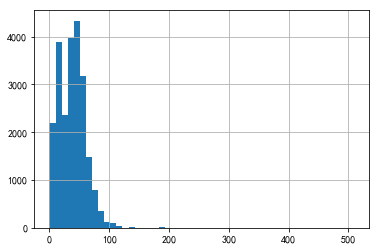

In [14]:
df_median.pm25.hist(bins=50)
df_median.pm25.describe()


In [15]:
df_median[df_median.pm25>300].groupby(['lat','lon']).count()

,,dt,pm25,pm10,temperature,humidity
lat,lon,,,,,
24.173,120.696,3,3,3,3,3
25.036,121.499,10,10,10,10,10
25.037,121.499,3,3,3,3,3
25.050,121.443,1,1,1,1,1


In [16]:
# get abnormal locs
threshold=300
abnorm_locations=df_median[df_median.pm25>threshold].drop_duplicates(subset=['lat','lon'])
abnorm_locations=abnorm_locations[['lat','lon']].values
abnorm_locations.shape

(4, 2)

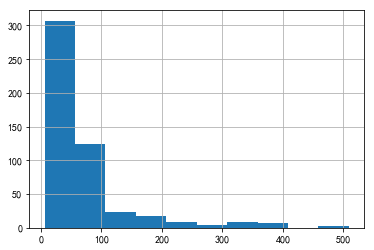

In [17]:
# abnormal locs, distribution
c=df_median.apply(lambda row: (row.lat,row.lon) in abnorm_locations,axis=1)
df_median[c].pm25.hist()

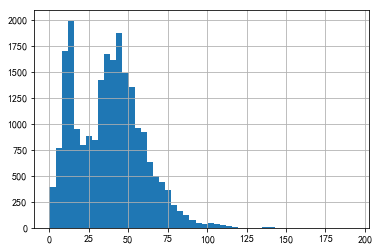

In [18]:
# distribution after remove abnormal locs 
c=df_median.apply(lambda row: (row.lat,row.lon) not in abnorm_locations,axis=1)
df_removeAbnormal=df_median[c]
df_removeAbnormal.pm25.hist(bins=50)

# script

In [19]:
def get_one_year(year):  
    print(year)
    path=os.path.join('~','station2grid','datasets','rawdata','air','airbox-%s.csv'%(year))
    df=pd.read_csv(path)
    df=df[:100000].copy() ###
    
    df['dt']=df.apply(lambda row: row['Date']+' '+row['Time'],axis=1)
    df['dt2']=df['dt'].apply(lambda x: change_time_interval(x,30))
    df_median=df.groupby(by=['dt2','lat','lon']).median().reset_index(drop=False)
    df_median=df_median.drop(columns=['PM1'])
    columns={
        'dt2':'dt',
        'PM2.5':'pm25',
        'PM10':'pm10',
        'Temperature':'temperature',
        'Humidity':'humidity',
    }
    df_median=df_median.rename(columns=columns)
    
    # remove abnormal
    threshold=300
    abnorm_locs=df_median[df_median.pm25>threshold].drop_duplicates(subset=['lat','lon'])
    abnorm_locs=abnorm_locs[['lat','lon']].values
    c=df_median.apply(lambda row: (row.lat,row.lon) not in abnorm_locs,axis=1)
    df_removeAbnormal=df_median[c]

    return df_removeAbnormal

In [20]:
dfs=[get_one_year(year) for year in [2017,2018]]            
df=pd.concat(dfs,axis=0)

In [26]:
df.tail()

,dt,lat,lon,pm25,pm10,temperature,humidity
66845,2018-01-03 00:30:00,25.080,121.522,18.0,0.0,23.75,90.0
66846,2018-01-03 00:30:00,25.080,121.563,1.0,2.0,28.37,50.0
66847,2018-01-03 00:30:00,25.105,121.515,14.0,17.0,21.62,85.0
66848,2018-01-03 00:30:00,34.968,128.318,30.0,68.0,12.14,30.0
66849,2018-01-03 00:30:00,35.703,51.349,27.0,46.0,11.25,43.0


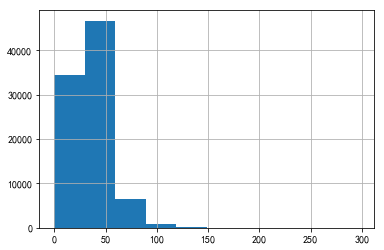

In [22]:
df.pm25.hist()